# Data Preprocessing Tools

## Importing the libraries

In [239]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [91]:
X_train_dataset = pd.read_csv('X_train.csv', delim_whitespace=True)
Y_train_dataset = pd.read_csv('y_train.csv',header=None)
X_test_dataset = pd.read_csv('X_test.csv', delim_whitespace=True)
Y_test_dataset = pd.read_csv('y_test.csv',header=None)
X_train_values = X_train_dataset.values
Y_train_values = Y_train_dataset.values
X_test_values = X_test_dataset.values
Y_test_values = Y_test_dataset.values

Y_test_dataset.rename(columns={0: 'label'}, inplace=True)

## Calculating the Percentages

In [92]:
#Function to calculate category counts in y_test and y_train
def calculate_category_counts(Y_values):
    category_counts = [0, 0, 0, 0, 0]

    for i in range(Y_values.shape[0]):
        category = Y_values[i][0]
        if category >= 0 and category <= 4:
            category_counts[category] += 1

    return category_counts

In [93]:
category_test_counts = calculate_category_counts(Y_test_values)
print(category_test_counts)


[135, 102, 98, 134, 88]


In [94]:
category_train_counts = calculate_category_counts(Y_train_dataset.values)
print(category_train_counts)

[375, 284, 319, 377, 313]


## Drawing Pie Chart

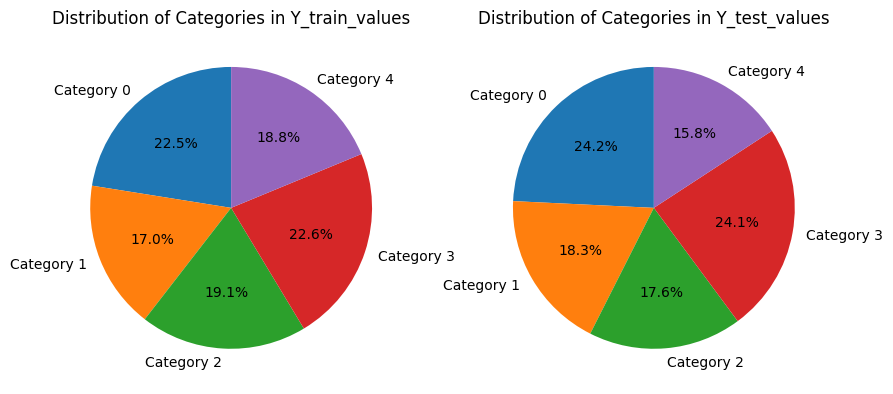

In [95]:
# Data for the pie charts
labels = ['Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4']

# Plotting the pie charts in a single frame
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Train data pie chart
ax1.pie(category_train_counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Categories in Y_train_values')

# Test data pie chart
ax2.pie(category_test_counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Categories in Y_test_values')

plt.show()

## Calculating Prior Probabilities

In [96]:
def calculate_prior_probabilities(category_counts, total_samples):
    prior_probabilities = [count / total_samples for count in category_counts]
    return prior_probabilities


In [97]:
total_train_samples = Y_train_values.shape[0]
prior_train_probabilities = calculate_prior_probabilities(category_train_counts, total_train_samples)
print(prior_train_probabilities)

[0.22482014388489208, 0.17026378896882494, 0.19124700239808154, 0.2260191846522782, 0.18764988009592326]


In [98]:
total_test_samples = Y_test_values.shape[0]
prior_test_probabilities = calculate_prior_probabilities(category_test_counts, total_test_samples)
print(prior_test_probabilities)

[0.24236983842010773, 0.18312387791741472, 0.17594254937163376, 0.24057450628366248, 0.15798922800718132]


## Calculating Word Frequencies

In [99]:
def calculate_word_frequency(word, label, X_dataset, Y_dataset):
    word_frequency = 0
    column_index = X_dataset.columns.get_loc(word)

    for i in range(X_dataset.shape[0]):
        if Y_dataset.values[i][0] == label:
            word_frequency += X_dataset.iloc[i, column_index]

    return word_frequency

In [100]:
frequency_alien = calculate_word_frequency('alien', 4 , X_train_dataset, Y_train_dataset)
print(frequency_alien)

3


In [101]:
frequency_thunder = calculate_word_frequency('thunder', 4 , X_train_dataset, Y_train_dataset)
print(frequency_thunder)

0


## Train Multinomial Naive Bayes

In [243]:
def train_multinomial_naive_bayes(X_train, Y_train, prior_train_probabilities):
    num_classes = 5
    num_words = X_train.shape[1]

    theta = np.zeros((num_words, num_classes))
    pi = np.zeros(num_classes)

    for yk in range(num_classes):
        pi[yk] = prior_train_probabilities[yk]

        class_indices = (Y_train == yk)
        Tj_yk_array = X_train[class_indices].sum(axis=0)

        Tj_yk_sum = Tj_yk_array.sum()

        theta[:, yk] = np.where(Tj_yk_array == 0, 0, (Tj_yk_array) / (Tj_yk_sum))
    print()
    return theta, pi

In [244]:
theta, pi = train_multinomial_naive_bayes(X_train_dataset, Y_train_dataset.values.flatten(), prior_train_probabilities)

In [245]:
print(theta)

[[1.95651834e-03 1.83295147e-03 1.98451519e-03 2.51445411e-03
  1.51721852e-03]
 [4.44520966e-03 1.97875443e-03 1.11803673e-04 5.44531463e-04
  1.16022593e-03]
 [1.36173676e-03 2.49947928e-04 4.75165609e-04 2.56250100e-04
  2.16745503e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.09989418e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.82492063e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.54994709e-05]]


In [246]:
def predict_multinomial_naive_bayes(X_test, theta, pi):
    num_classes = theta.shape[1]
    num_words = theta.shape[0]

    log_theta = np.log(theta)

    scores = np.dot(X_test.values, log_theta) + np.log(pi)

    predictions = np.argmax(scores, axis=1)

    return predictions


## Test Multinomial Naive Bayes

In [247]:
def calculate_accuracy(predictions, true_labels):
    correct_predictions = 0
    total_instances = len(predictions)

    for i in range(total_instances):
        if predictions[i] == true_labels[i]:
            correct_predictions += 1

    accuracy = correct_predictions / total_instances
    return accuracy

In [248]:
def calculate_confision_matrix(true_labels, predictions):
  conf_matrix = confusion_matrix(true_labels, predictions)
  print("Confusion Matrix:")
  print(conf_matrix)

  # Visualize confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=["Class {}".format(i) for i in range(conf_matrix.shape[1])],
              yticklabels=["Class {}".format(i) for i in range(conf_matrix.shape[0])])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

<ipython-input-246-6f32f74d0e54>:5: RuntimeWarning: divide by zero encountered in log
  log_theta = np.log(theta)


Accuracy: 0.242
Confusion Matrix:
[[135   0   0   0   0]
 [102   0   0   0   0]
 [ 98   0   0   0   0]
 [134   0   0   0   0]
 [ 88   0   0   0   0]]


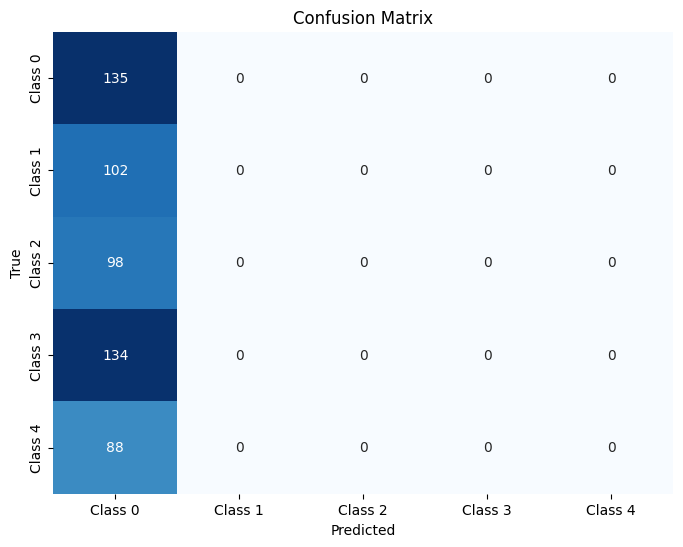

In [249]:
predictions = predict_multinomial_naive_bayes(X_test_dataset, theta, pi)
accuracy = calculate_accuracy(predictions, Y_test_dataset.values.flatten())
print(f"Accuracy: {accuracy:.3f}")
calculate_confision_matrix(Y_test_dataset.values, predictions)

## Train Multinomial Naive Bayes With Smoothing

In [250]:
def train_multinomial_naive_bayes_with_smoothing(X_train, Y_train, prior_train_probabilities):
    num_classes = 5
    num_words = X_train.shape[1]

    theta = np.zeros((num_words, num_classes))
    pi = np.zeros(num_classes)

    for yk in range(num_classes):
        pi[yk] = prior_train_probabilities[yk]

        class_indices = (Y_train == yk)
        Tj_yk_array = X_train[class_indices].sum(axis=0)

        Tj_yk_sum = Tj_yk_array.sum()

        theta[:, yk] = np.where(Tj_yk_array == 0, 0, (Tj_yk_array + 1.0) / (Tj_yk_sum + num_words))

    return theta, pi

In [251]:
theta, pi = train_multinomial_naive_bayes_with_smoothing(X_train_dataset, Y_train_dataset.values.flatten(), prior_train_probabilities)

## Test Multinomial Naive Bayes With Smoothing

In [252]:
def predict_multinomial_naive_bayes_with_smoothing(X_test, theta, pi):
    num_classes = theta.shape[1]
    num_words = theta.shape[0]

    log_theta = np.log(theta + (1.0/num_words))

    scores = np.dot(X_test.values, log_theta) + np.log(pi)

    predictions = np.argmax(scores, axis=1)

    return predictions

Accuracy: 0.973
Confusion Matrix:
[[130   0   3   0   2]
 [  0  96   1   0   5]
 [  1   0  96   0   1]
 [  0   0   1 133   0]
 [  1   0   0   0  87]]


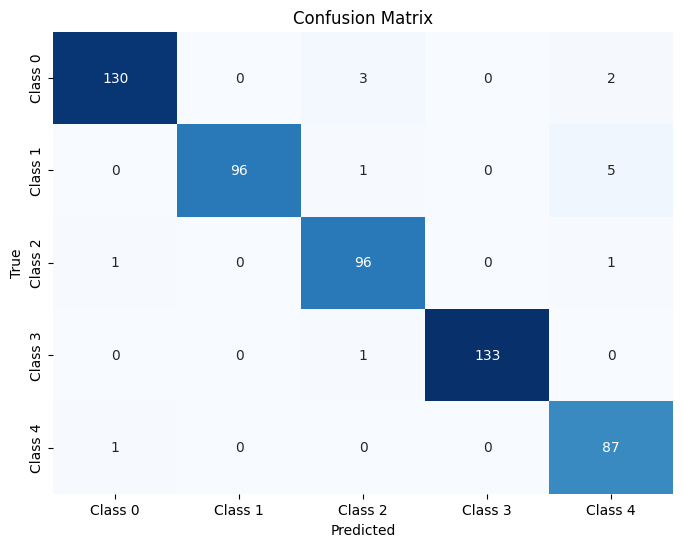

In [253]:
predictions = predict_multinomial_naive_bayes_with_smoothing(X_test_dataset, theta, pi)
accuracy = calculate_accuracy(predictions, Y_test_dataset.values.flatten())
print(f"Accuracy: {accuracy:.3f}")
calculate_confision_matrix(Y_test_dataset.values, predictions)

## Train Bernoulli Naive Bayes

In [260]:
def train_bernoulli_naive_bayes(X_train, Y_train, prior_train_probabilities, alpha=1):
    num_classes = 5
    num_words = X_train.shape[1]

    theta = np.zeros((num_words, num_classes))
    pi = np.zeros(num_classes)

    for yk in range(num_classes):
        yk_indices = (Y_train == yk)
        Nyk_array = np.sum(yk_indices)

        pi[yk] = prior_train_probabilities[yk]
        # Apply binarization to X_train
        X_train_bin = np.where(X_train > 0, 1, 0)

        # Use binarized matrix in the summation
        Sj_yk_array = X_train_bin[yk_indices].sum(axis=0)
        theta[:, yk] = (Sj_yk_array + alpha) / (Nyk_array + 2 * alpha)

    return theta, pi

In [261]:
theta, pi = train_bernoulli_naive_bayes(X_train_dataset, Y_train_dataset.values.flatten(), prior_train_probabilities)

In [266]:
def predict_bernoulli_naive_bayes(X_test, theta, pi):
    num_classes = theta.shape[1]
    num_words = theta.shape[0]
    X_binary = (X_test > 0).astype(int)

    # Use the logarithmic probabilities calculated during training
    log_theta = np.log(theta)
    log_not_theta = np.log(1 - theta)

    # Initialize scores with logarithmic priors
    scores = np.log(pi) + np.dot(X_binary.values, log_theta) + np.dot(1 - X_test.values, log_not_theta)

    # Choose the class with the highest score
    predictions = np.argmax(scores, axis=1)

    return predictions

## Test Bernoulli Naive Bayes With Smoothing

Accuracy: 0.966
Confusion Matrix:
[[132   0   2   0   1]
 [  2  97   1   0   2]
 [  4   0  93   0   1]
 [  0   0   0 134   0]
 [  4   2   0   0  82]]


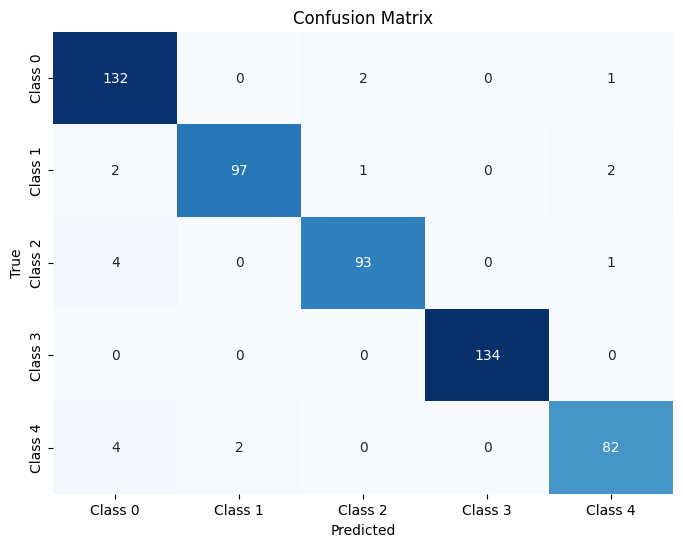

In [268]:
predictions = predict_bernoulli_naive_bayes(X_test_dataset, theta, pi)
accuracy = calculate_accuracy(predictions, Y_test_dataset.values.flatten())
print(f"Accuracy: {accuracy:.3f}")
calculate_confision_matrix(Y_test_dataset.values, predictions)